# <b><u>Predicting Heart Disease using Machine Learning</u></b>

importing the necessary libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

### <b>Performing EDA(Exploratory Data Analysis)</b>:

In [43]:
data1 = pd.read_csv("heart.csv")
data1 = pd.DataFrame(data1)

In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
#To check the number of records and features in the dataset
data1.shape

(303, 14)

Check and delete the duplicate rows in the data

In [46]:
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


In [47]:
data1 = data1.drop_duplicates()
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)


Number of duplicate rows ::  (0, 14)


In [48]:
#Checking if the other data is consistent
data1.shape

(302, 14)

Check null values and remove it from the data

In [49]:
print("Null values :: ")
print(data1.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


### <b>Detecting Outliers</b>:

1. Detecting Outliers using IQR(InterQuartile Range):

<AxesSubplot:xlabel='age'>

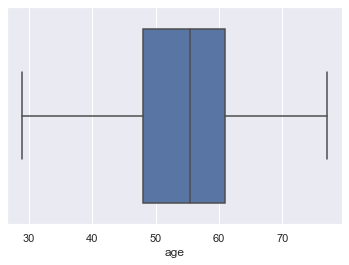

In [50]:
sns.boxplot(x=data1['age'])

<AxesSubplot:xlabel='sex'>

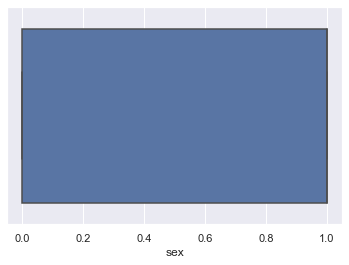

In [51]:

sns.boxplot(x=data1['sex'])

<AxesSubplot:xlabel='cp'>

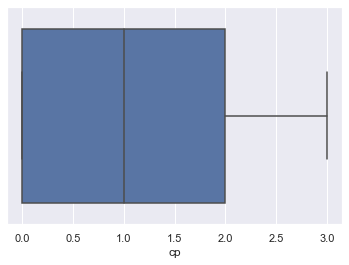

In [52]:
sns.boxplot(x=data1['cp'])

<AxesSubplot:xlabel='trtbps'>

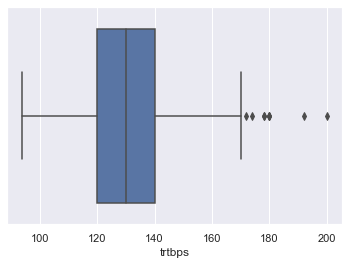

In [53]:
sns.boxplot(x=data1['trtbps'])

<AxesSubplot:xlabel='chol'>

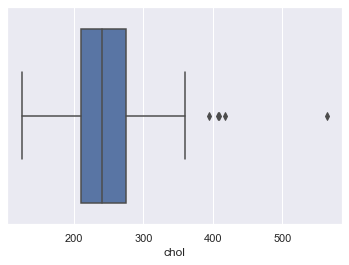

In [54]:
sns.boxplot(x=data1['chol'])

<AxesSubplot:xlabel='fbs'>

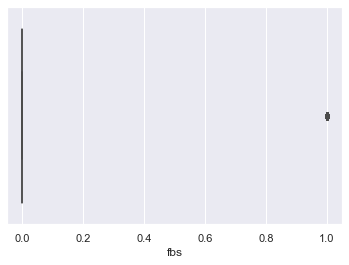

In [55]:
sns.boxplot(x=data1['fbs'])

<AxesSubplot:xlabel='restecg'>

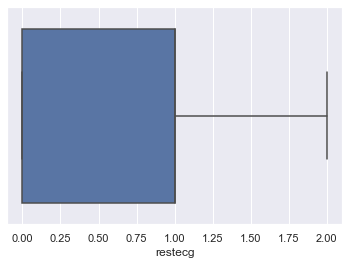

In [56]:
sns.boxplot(x=data1['restecg'])

<AxesSubplot:xlabel='thalachh'>

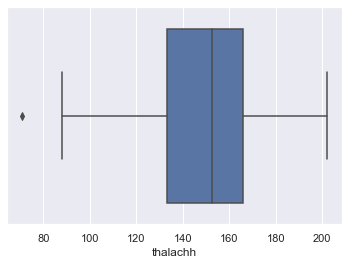

In [57]:
sns.boxplot(x=data1['thalachh'])

<AxesSubplot:xlabel='exng'>

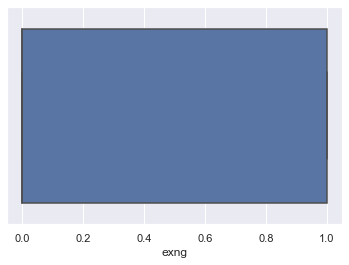

In [58]:
sns.boxplot(x=data1['exng'])

<AxesSubplot:xlabel='oldpeak'>

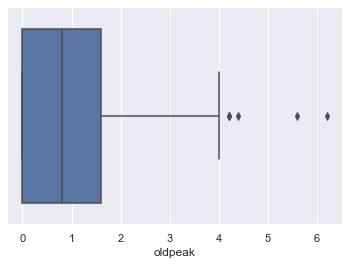

In [59]:
sns.boxplot(x=data1['oldpeak'])

<AxesSubplot:xlabel='slp'>

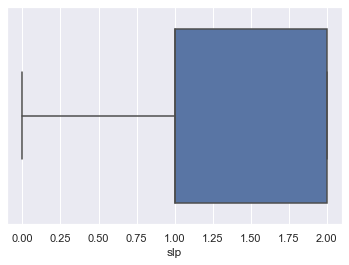

In [60]:
sns.boxplot(x=data1['slp'])

<AxesSubplot:xlabel='caa'>

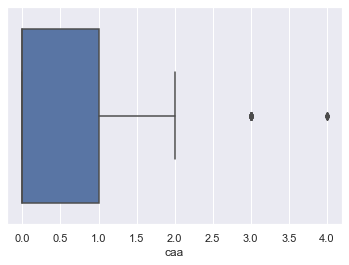

In [61]:
sns.boxplot(x=data1['caa'])

<AxesSubplot:xlabel='thall'>

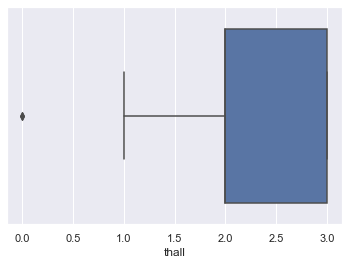

In [62]:
sns.boxplot(x=data1['thall'])

So here the outliers are present in trtbps, chol, thalachh, oldpeak, caa, thall.

In [63]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)

IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


### Removing the outliers using IQR(Inter-Quartile Range):
In IQR the data points that are not in the range (lower limit, upper limit) are considered as outliers.
- upper limit = Q3 + 1.5 * IQR
- lower limit = Q1 – 1.5 * IQR

In [64]:
data2 = data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
data2.shape

(228, 14)

### Z-Score:
- Here the data point is considered as an outlier if the corresponding Z-score > 3.

In [65]:
z = np.abs(stats.zscore(data1))
data3 = data1[(z<3).all(axis=1)]
data3.shape

(287, 14)

As the number of records available is higher after Z-score, we will proceed with ‘data3’

### Correlation


Finding the correlation between variables:

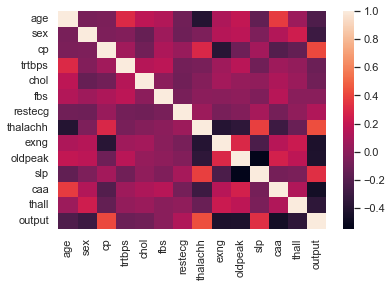

In [66]:
import seaborn as sns
sns.heatmap(data3.corr())
plt.show()

In [67]:
pearsonCorr = data3.corr(method='pearson')
spearmanCorr = data3.corr(method='spearman')

### Pearson Correlation:

Text(0.5, 1.0, 'Pearson Correlation')

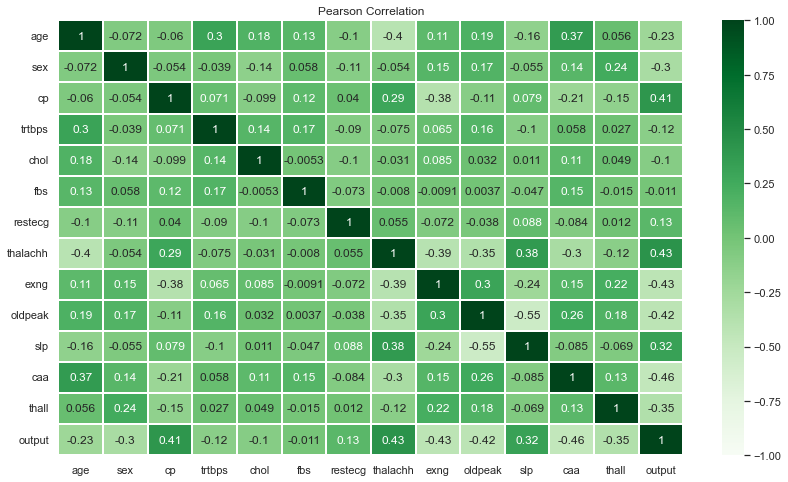

In [68]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

### Spearman Correlation:

Text(0.5, 1.0, 'Spearman Correlation')

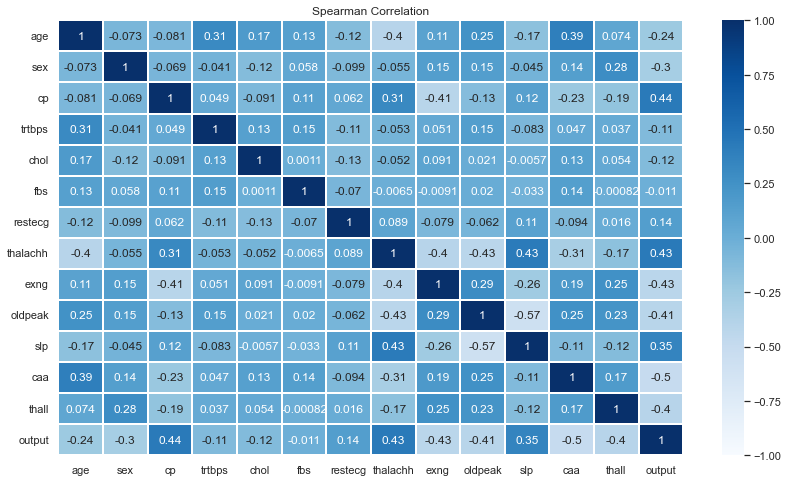

In [69]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

From all the graphs above it can be said that fbs, trtbps, chol and restecg has very low correaltion with output.

In [70]:
x = data3.drop("output", axis=1)
y = data3["output"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

## <b>Training Models</b>:

### Logistic Regression:

In [71]:
names = ['Age', 'Sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)

y_pred_logReg = logReg.predict(x_test)

print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))

#Removing the features with low correlation and checking effect on accuracy of model
x_train1 = x_train.drop("fbs",axis=1)
x_train1 = x_train1.drop("trtbps", axis=1)
x_train1 = x_train1.drop("chol", axis=1)
x_train1 = x_train1.drop("restecg", axis=1)

x_test1 = x_test.drop("fbs", axis=1)
x_test1 = x_test1.drop("trtbps", axis=1)
x_test1 = x_test1.drop("chol", axis=1)
x_test1 = x_test1.drop("restecg", axis=1)

logReg1 = LogisticRegression(random_state=0, solver='liblinear').fit(x_train1,y_train)
y_pred_logReg1 = logReg1.predict(x_test1)
print("\nAccuracy of logistic regression classifier after removing features:: " ,metrics.accuracy_score(y_test,y_pred_logReg1))


Accuracy of logistic regression classifier ::  0.8390804597701149

Accuracy of logistic regression classifier after removing features::  0.8620689655172413


### Decision Tree:

In [72]:
decTree = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree.fit(x_train,y_train)

y_pred_decTree = decTree.predict(x_test)

print("Accuracy of Decision Trees :: " , metrics.accuracy_score(y_test,y_pred_decTree))

#Removing the features which have low correlation with output 
x_train_dt = x_train.drop("fbs",axis=1)
x_train_dt = x_train_dt.drop("trtbps", axis=1)
x_train_dt = x_train_dt.drop("chol", axis=1)
x_train_dt = x_train_dt.drop("age", axis=1)
x_train_dt = x_train_dt.drop("sex", axis=1)

x_test_dt = x_test.drop("fbs", axis=1)
x_test_dt = x_test_dt.drop("trtbps", axis=1)
x_test_dt = x_test_dt.drop("chol", axis=1)
x_test_dt = x_test_dt.drop("age", axis=1)
x_test_dt = x_test_dt.drop("sex", axis=1)

decTree1 = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree1.fit(x_train_dt, y_train)
y_pred_dt1 = decTree1.predict(x_test_dt)

print("Accuracy of decision Tree after removing features:: ", metrics.accuracy_score(y_test,y_pred_dt1))

Accuracy of Decision Trees ::  0.8045977011494253
Accuracy of decision Tree after removing features::  0.7471264367816092


### Random Forest Classifier:

In [73]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))

#Finding the score of each feature in model and droping the features with low scores
f_imp = rf.feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (names[i],v))

Accuracy of Random Forest Classifier ::  0.8045977011494253
Feature: Age, Score: 0.09267
Feature: Sex, Score: 0.03446
Feature: cp, Score: 0.09902
Feature: trtbps, Score: 0.08174
Feature: chol, Score: 0.08780
Feature: fbs, Score: 0.00881
Feature: restecg, Score: 0.02574
Feature: thalachh, Score: 0.10919
Feature: exng, Score: 0.05109
Feature: oldpeak, Score: 0.11689
Feature: slp, Score: 0.06301
Feature: caa, Score: 0.08498
Feature: thall, Score: 0.14460


Removing the features with low scores:

In [74]:
#Removing the following features : fbs(score=0.006), sex(score=0.02), trtbps(score=0.072), chol(score=0.078), 
#restecg(score=0.02), exng(score=0.06), slp(score=0.06)

#names = ['Age', 'Sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
names1 = ['Age', 'Sex', 'cp', 'trtbps', 'chol','restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

x_train_rf2 = x_train.drop("fbs",axis=1)
#x_train_rf2 = x_train_rf2.drop("sex",axis=1)
#x_train_rf2 = x_train_rf2.drop("restecg",axis=1)
#x_train_rf2 = x_train_rf2.drop("slp",axis=1)
#x_train_rf2 = x_train_rf2.drop("exng",axis=1)
#x_train_rf2 = x_train_rf2.drop("trtbps",axis=1)
#x_train_rf2 = x_train_rf2.drop("chol",axis=1)
#x_train_rf2 = x_train_rf2.drop("age",axis=1)

x_test_rf2 = x_test.drop("fbs", axis=1)
#x_test_rf2 = x_test_rf2.drop("sex", axis=1)
#x_test_rf2 = x_test_rf2.drop("restecg",axis=1)
#x_test_rf2 = x_test_rf2.drop("slp",axis=1)
#x_test_rf2 = x_test_rf2.drop("exng",axis=1)
#x_test_rf2 = x_test_rf2.drop("trtbps",axis=1)
#x_test_rf2 = x_test_rf2.drop("chol",axis=1)
#x_test_rf2 = x_test_rf2.drop("age",axis=1)

rf2 = RandomForestClassifier(n_estimators=500)
rf2.fit(x_train_rf2,y_train)

y_pred_rf2 = rf2.predict(x_test_rf2)
print("Accuracy of Random Forest Classifier after removing features with low score :")
print("New Accuracy :: " , metrics.accuracy_score(y_test,y_pred_rf2))
print("\n")
print("---------------------------------------------------------------------------------------------")

f_imp = rf2.feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (names1[i],v))
print("---------------------------------------------------------------------------------------------")

Accuracy of Random Forest Classifier after removing features with low score :
New Accuracy ::  0.7931034482758621


---------------------------------------------------------------------------------------------
Feature: Age, Score: 0.09520
Feature: Sex, Score: 0.03629
Feature: cp, Score: 0.10080
Feature: trtbps, Score: 0.08178
Feature: chol, Score: 0.08722
Feature: restecg, Score: 0.02435
Feature: thalachh, Score: 0.12016
Feature: exng, Score: 0.05017
Feature: oldpeak, Score: 0.11438
Feature: slp, Score: 0.07135
Feature: caa, Score: 0.08036
Feature: thall, Score: 0.13795
---------------------------------------------------------------------------------------------


### K Neighbours Classifier:

In [75]:
#K Neighbours Classifier

knc =  KNeighborsClassifier()
knc.fit(x_train,y_train)

y_pred_knc = knc.predict(x_test)

print("Accuracy of K-Neighbours classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))

Accuracy of K-Neighbours classifier ::  0.6666666666666666


C:\Users\MEHTA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [76]:
#Models and their accuracy

print("Models and their accuracy:")
print("Logistic Regression Classifier :: ", metrics.accuracy_score(y_test,y_pred_logReg1))
print("Decision Tree :: ", metrics.accuracy_score(y_test,y_pred_dt1))
print("Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
print("K Neighbours Classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))

Models and their accuracy:
Logistic Regression Classifier ::  0.8620689655172413
Decision Tree ::  0.7471264367816092
Random Forest Classifier ::  0.8045977011494253
K Neighbours Classifier ::  0.6666666666666666
